In [32]:
import numpy as np
import scipy as sp
from scipy.integrate import quad, dblquad, tplquad, odeint, ode

In [2]:
f = lambda x: np.exp(-x**2)
a = 0
b = 1
integr, abs_err = quad(f, a, b)
print(f"Значение интеграла: {integr}; \t абсолютная погрешность: {abs_err}")

Значение интеграла: 0.7468241328124271; 	 абсолютная погрешность: 8.291413475940725e-15


In [3]:
f1 = lambda x,n: x**n
a = 0
b = 1

integr, abs_err = quad(f1, a, b, args = (3,))
print(f"Значение интеграла: {integr}; \t абсолютная погрешность: {abs_err:.16f}")

Значение интеграла: 0.25; 	 абсолютная погрешность: 0.0000000000000028


In [4]:
f2 = lambda x, y: np.exp(-x**2 - y**2)

integr, abs_err = dblquad(f2, -np.Inf, np.Inf, lambda x: - np.Inf, lambda x: x)
print(f"Значение интеграла: {integr}; \t абсолютная погрешность: {abs_err:.16f}")

Значение интеграла: 1.5707963267841654; 	 абсолютная погрешность: 0.0000000148903659


In [5]:
f2 = lambda x, y: x + 2*y

integr, abs_err = dblquad(f2, 0, 1, 0, 3)
print(f"Значение интеграла: {integr}; \t абсолютная погрешность: {abs_err:.16f}")

Значение интеграла: 7.500000000000001; 	 абсолютная погрешность: 0.0000000000001164


In [6]:
def f(y, t, zeta, w0):
    x, p = y[0], y[1]
    dx = p
    dp = -2 * zeta * w0 * p - w0 **2 * x
    return [dx, dp]

y0 = [1.0, 0.0]
t = np.linspace(0, 10, 1000)
w0 = 2 * np.pi * 1.0

In [7]:
y1 = odeint(f, y0, t, args=(0.0, w0))
y2 = odeint(f, y0, t, args=(0.2, w0))
y3 = odeint(f, y0, t, args=(1.0, w0))
y4 = odeint(f, y0, t, args=(5.0, w0))

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image

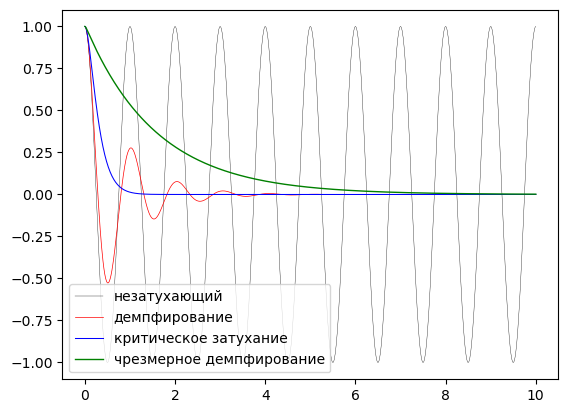

In [9]:
fig, ax = plt.subplots()
ax.plot(t, y1[:, 0], 'k', label="незатухающий", linewidth = 0.25)
ax.plot(t, y2[:, 0], 'r', label="демпфирование", linewidth = 0.5)
ax.plot(t, y3[:, 0], 'b', label="критическое затухание", linewidth = 0.75)
ax.plot(t, y4[:, 0], 'g', label="чрезмерное демпфирование", linewidth = 1.00)
ax.legend();

## Optimize

In [10]:
from scipy import optimize

In [11]:
def f(x):
    return 4*x**3 + (x - 2)**2 + x**4

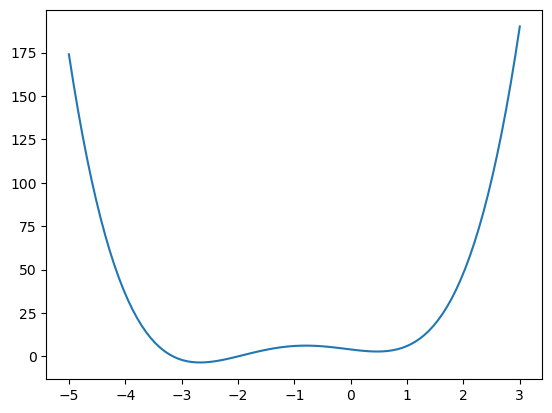

In [13]:
fig, ax = plt.subplots()
x = np.linspace(-5, 3, 100)
ax.plot(x, f(x));

In [47]:
x_min1 = optimize.fmin_bfgs(f, -2)
x_min1

Optimization terminated successfully.
         Current function value: -3.506641
         Iterations: 5
         Function evaluations: 16
         Gradient evaluations: 8


array([-2.6729815])

In [48]:
x_min2 = optimize.fmin_bfgs(f, 0.5)
x_min2

Optimization terminated successfully.
         Current function value: 2.804988
         Iterations: 3
         Function evaluations: 10
         Gradient evaluations: 5


array([0.46961745])

In [49]:
optimize.brent(f)

0.46961743402759754

In [53]:
optimize.fminbound(f, -2, 5)

0.46961730177210087

In [54]:
def f1(x):
    return np.tan(x) - 2.0 / x

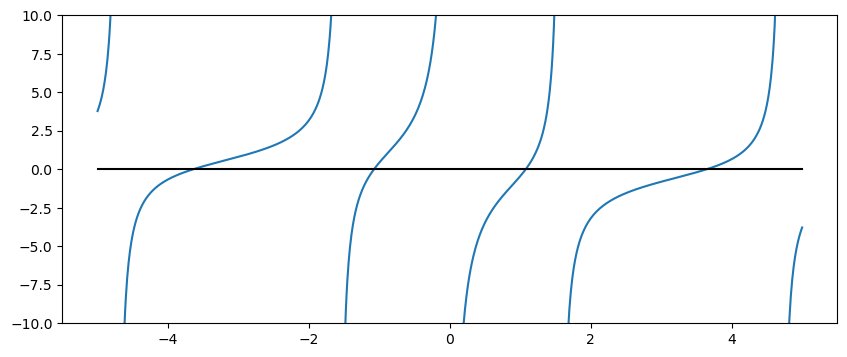

In [58]:
fig, ax = plt.subplots(figsize=(10,4))
x = np.linspace(-5, 5, 1000)
y = f1(x)
mask = np.where(abs(y) > 50)
x[mask] = y[mask] = np.NaN
ax.plot(x, y)
ax.plot([-5, 5], [0, 0], 'k')
ax.set_ylim(-10, 10);

In [61]:
optimize.fsolve(f1, 3)

array([3.64359717])

## Interpolate

In [62]:
from scipy.interpolate import *

In [63]:
def f2(x):
    return np.sin(x)

In [68]:
n = np.arange(0, 10)
x = np.linspace(0, 9, 100)
y_meas = f2(n)
y_real = f2(x)
linear_interpolation = interp1d(n, y_meas)
y_interplt1 = linear_interpolation(x)
cubic_interpolation = interp1d(n, y_meas, kind = 'cubic')
y_interplt2 = cubic_interpolation(x)

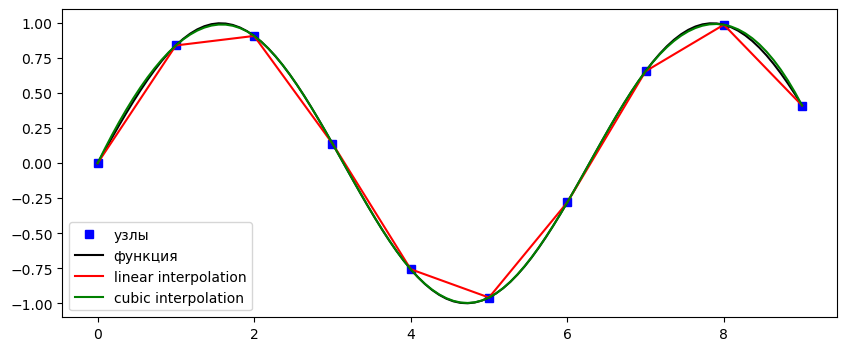

In [71]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(n, y_meas, 'bs', label = 'узлы')
ax.plot(x, y_real, 'k', label = 'функция')
ax.plot(x, y_interplt1, 'r', label = 'linear interpolation')
ax.plot(x, y_interplt2, 'g', label = 'cubic interpolation')
ax.legend(loc=3);

## Example

In [73]:
from scipy import stats

In [74]:
X = stats.poisson(3.5)

In [76]:
n = np.arange(0, 15)

(array([ 31., 102., 180., 227., 171., 125.,  91.,  42.,  20.,  11.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

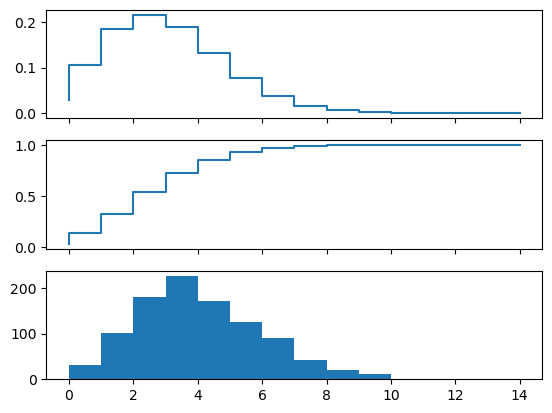

In [77]:
fig, axes = plt.subplots(3, 1, sharex=True)
axes[0].step(n, X.pmf(n))
axes[1].step(n, X.cdf(n))
axes[2].hist(X.rvs(size = 1000))

(array([ 1.,  1.,  0.,  2.,  3.,  4.,  3.,  4.,  5., 18., 11., 14., 14.,
        25., 25., 21., 21., 35., 35., 25., 43., 33., 36., 43., 38., 47.,
        29., 50., 51., 39., 40., 23., 41., 32., 31., 28., 25., 23., 18.,
        14., 12.,  4.,  5.,  4.,  3.,  4.,  8.,  5.,  1.,  3.]),
 array([-2.73675183, -2.62998045, -2.52320907, -2.41643769, -2.30966631,
        -2.20289493, -2.09612355, -1.98935218, -1.8825808 , -1.77580942,
        -1.66903804, -1.56226666, -1.45549528, -1.3487239 , -1.24195252,
        -1.13518114, -1.02840976, -0.92163838, -0.814867  , -0.70809562,
        -0.60132424, -0.49455286, -0.38778148, -0.2810101 , -0.17423872,
        -0.06746734,  0.03930404,  0.14607542,  0.2528468 ,  0.35961818,
         0.46638956,  0.57316094,  0.67993232,  0.7867037 ,  0.89347508,
         1.00024646,  1.10701784,  1.21378922,  1.3205606 ,  1.42733198,
         1.53410336,  1.64087474,  1.74764612,  1.8544175 ,  1.96118888,
         2.06796025,  2.17473163,  2.28150301,  2.38827439,

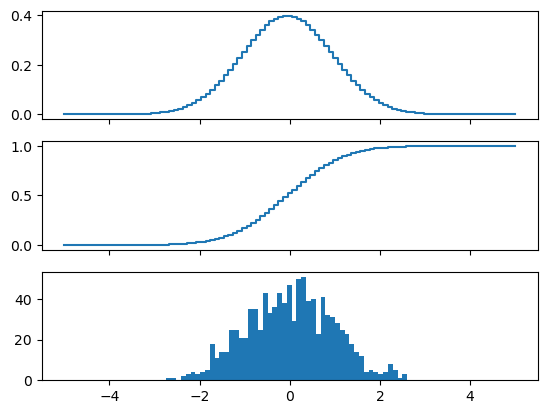

In [83]:
Y = stats.norm()
x = np.linspace(-5, 5, 100)
fig, axes = plt.subplots(3, 1, sharex=True)
axes[0].step(x, Y.pdf(x))
axes[1].step(x, Y.cdf(x))
axes[2].hist(Y.rvs(size = 1000), bins = 50)

In [85]:
X.mean(), X.std(), X.var()

(3.5, 1.8708286933869707, 3.5)

In [86]:
Y.mean(), Y.std(), Y.var()

(0.0, 1.0, 1.0)

In [90]:
t_statistics, p_value = stats.ttest_ind(X.rvs(size = 1000), X.rvs(size=1000))
print(f"T-statistic: {t_statistics}")
print(f"P-value: {p_value}")

T-statistic: 0.19325491778532258
P-value: 0.846778973825837


In [93]:
stats.ttest_1samp(Y.rvs(size = 1000), 0.1)

TtestResult(statistic=-3.095653233644713, pvalue=0.0020185079747703435, df=999)

In [97]:
stats.ttest_1samp(Y.rvs(size = 1000), Y.mean())

TtestResult(statistic=0.8675338753338018, pvalue=0.38585789399444115, df=999)